# Social Mining Enhancement — Exploratory Network & Interaction Analysis (pm4py)

## Project Overview
This notebook explores **social mining** concepts using event log data to uncover interaction patterns between resources (people/roles) involved in a process.
Using **pm4py**, the workflow derives social structures from event data, enabling insights such as collaboration intensity, handoff relationships, and potential coordination bottlenecks.

All code outputs (prints/figures) are intentionally preserved for transparency and reproducibility.


## Data Context
The analysis assumes an event log where each event includes:
- **Case ID** (process instance)
- **Activity** (task label)
- **Timestamp**
- **Resource** (person/role executing the activity)

Social mining methods leverage these fields to infer how work is distributed and how participants interact through the process execution.


## Methodology
1. Load and validate the event log with pm4py
2. Prepare the log for resource-centric analysis (ensure resource column is present and consistent)
3. Derive social relations (e.g., handoffs / collaboration signals) from event sequences
4. Compute summary statistics and visualize social structures when available
5. Preserve intermediate outputs to support interpretability


In [20]:
!pip install gdown==4.6 --upgrade

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.1
    Uninstalling gdown-4.7.1:
      Successfully uninstalled gdown-4.7.1


In [21]:
from IPython.display import clear_output

# El siguiente código sólo se ejecuta si nos encontramos en ambiente Google Colab
if 'google.colab' in str(get_ipython()):

  # Log de eventos
  !gdown 14x3csaijugP7hj7DY16VO67yxfLKuaRx

#clear_output()
print("Archivo reparacion_vehiculos.csv descargado correctamente")

Downloading...
From: https://drive.google.com/uc?id=14x3csaijugP7hj7DY16VO67yxfLKuaRx
To: /content/reparacion_vehiculos_min.csv
100% 81.6k/81.6k [00:00<00:00, 88.9MB/s]
Archivo reparacion_vehiculos.csv descargado correctamente


In [2]:
!pip install pm4py

clear_output()
print("PM4Py instalado.")

PM4Py instalado.


In [3]:
!pip install pyvis

clear_output()
print("Pyvis instalado.")

Pyvis instalado.


In [23]:
import pandas as pd
import pm4py
log_csv = pd.read_csv('reparacion_vehiculos_min.csv', sep = ',')

log_csv = pm4py.format_dataframe(log_csv,
                                case_id='ID Caso',
                                activity_key='Actividad',
                                timestamp_key='Fin',
                                timest_format  = '%Y-%m-%d %H:%M:%S')

log_csv['time:timestamp'] = log_csv['time:timestamp'].astype('datetime64[ns]')

In [24]:
log_csv.head()

,ID Caso,Actividad,Inicio,Fin,Ejecutor,Sede,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,Recibir respuesta,17-07-2023 11:34,17-07-2023 11:34,Gabriela,Santiago Centro,1,Recibir respuesta,2023-07-17 11:34:00,0,0
1,1,Recibir vehiculo,17-07-2023 8:00,17-07-2023 8:15,Pablo,Santiago Centro,1,Recibir vehiculo,2023-07-17 08:15:00,1,0
2,1,Elaborar presupuesto,17-07-2023 8:34,17-07-2023 9:25,Norma,Santiago Centro,1,Elaborar presupuesto,2023-07-17 09:25:00,2,0
3,1,Enviar presupuesto a cliente,17-07-2023 9:45,17-07-2023 9:50,Gabriela,Santiago Centro,1,Enviar presupuesto a cliente,2023-07-17 09:50:00,3,0
4,1,Coordinar retiro,18-07-2023 8:06,18-07-2023 8:20,Gabriela,Santiago Centro,1,Coordinar retiro,2023-07-18 08:20:00,4,0


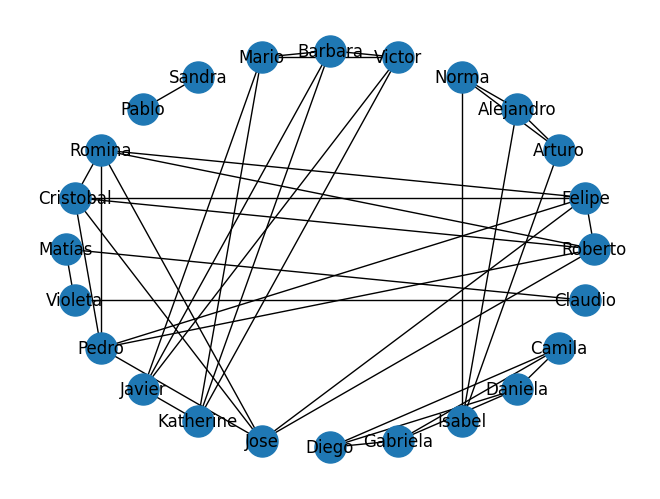

In [25]:
metric_resource_similarity = pm4py.org.discover_activity_based_resource_similarity(log_csv.copy(), resource_key='Ejecutor')

pm4py.vis.view_sna(metric_resource_similarity, variant_str = "networkx")

pm4py.save_vis_sna(metric_resource_similarity, 'resource_similarity.html')


In [26]:
metric = pm4py.org.discover_organizational_roles(log_csv.copy(), resource_key='Ejecutor')
metric

[Activities: ['Comprar repuestos', 'Recibir repuestos'] Originators importance {'Claudio': 40, 'Matías': 46, 'Violeta': 100},
 Activities: ['Coordinar retiro', 'Enviar presupuesto a cliente', 'Recibir respuesta'] Originators importance {'Camila': 50, 'Daniela': 50, 'Diego': 59, 'Gabriela': 56},
 Activities: ['Elaborar presupuesto'] Originators importance {'Alejandro': 26, 'Arturo': 24, 'Isabel': 20, 'Norma': 30},
 Activities: ['Entregar vehiculo', 'Recibir vehiculo'] Originators importance {'Pablo': 100, 'Sandra': 100},
 Activities: ['Instalar repuestos', 'Restaurar danos'] Originators importance {'Cristobal': 38, 'Felipe': 32, 'Jose': 41, 'Pedro': 26, 'Roberto': 33, 'Romina': 16},
 Activities: ['Pintar vehiculo'] Originators importance {'Barbara': 21, 'Javier': 22, 'Katherine': 18, 'Mario': 21, 'Victor': 11},
 Activities: ['Probar vehiculo'] Originators importance {'Jose': 9, 'Pedro': 20, 'Roberto': 20, 'Romina': 43, 'Victor': 1}]

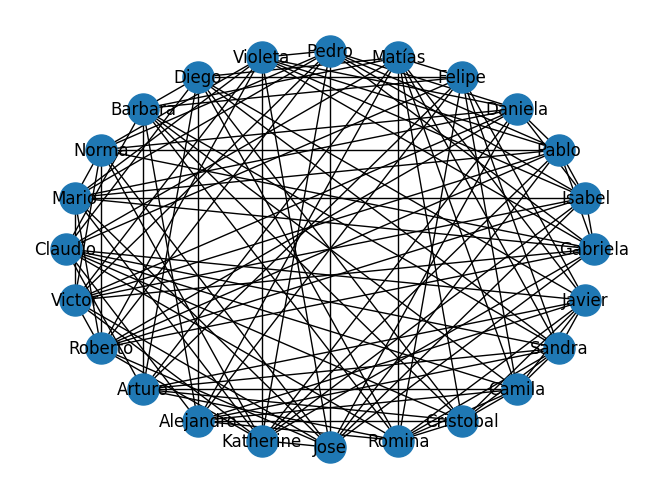

In [27]:
metric_working_together = pm4py.org.discover_working_together_network(log_csv.copy(), resource_key='Ejecutor')

pm4py.vis.view_sna(metric_working_together, variant_str = "networkx")

pm4py.save_vis_sna(metric_working_together, 'working_together.html')

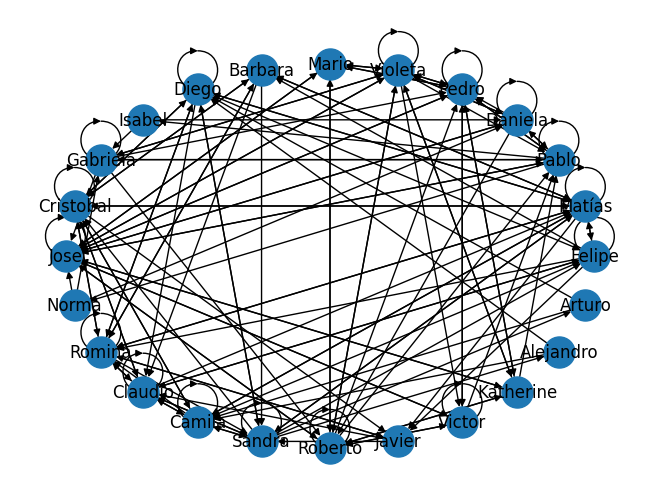

In [28]:
metric_handover = pm4py.org.discover_handover_of_work_network(log_csv.copy(), resource_key='Ejecutor')
pm4py.vis.view_sna(metric_handover, variant_str = "networkx")

pm4py.save_vis_sna(metric_handover, 'handover.html')

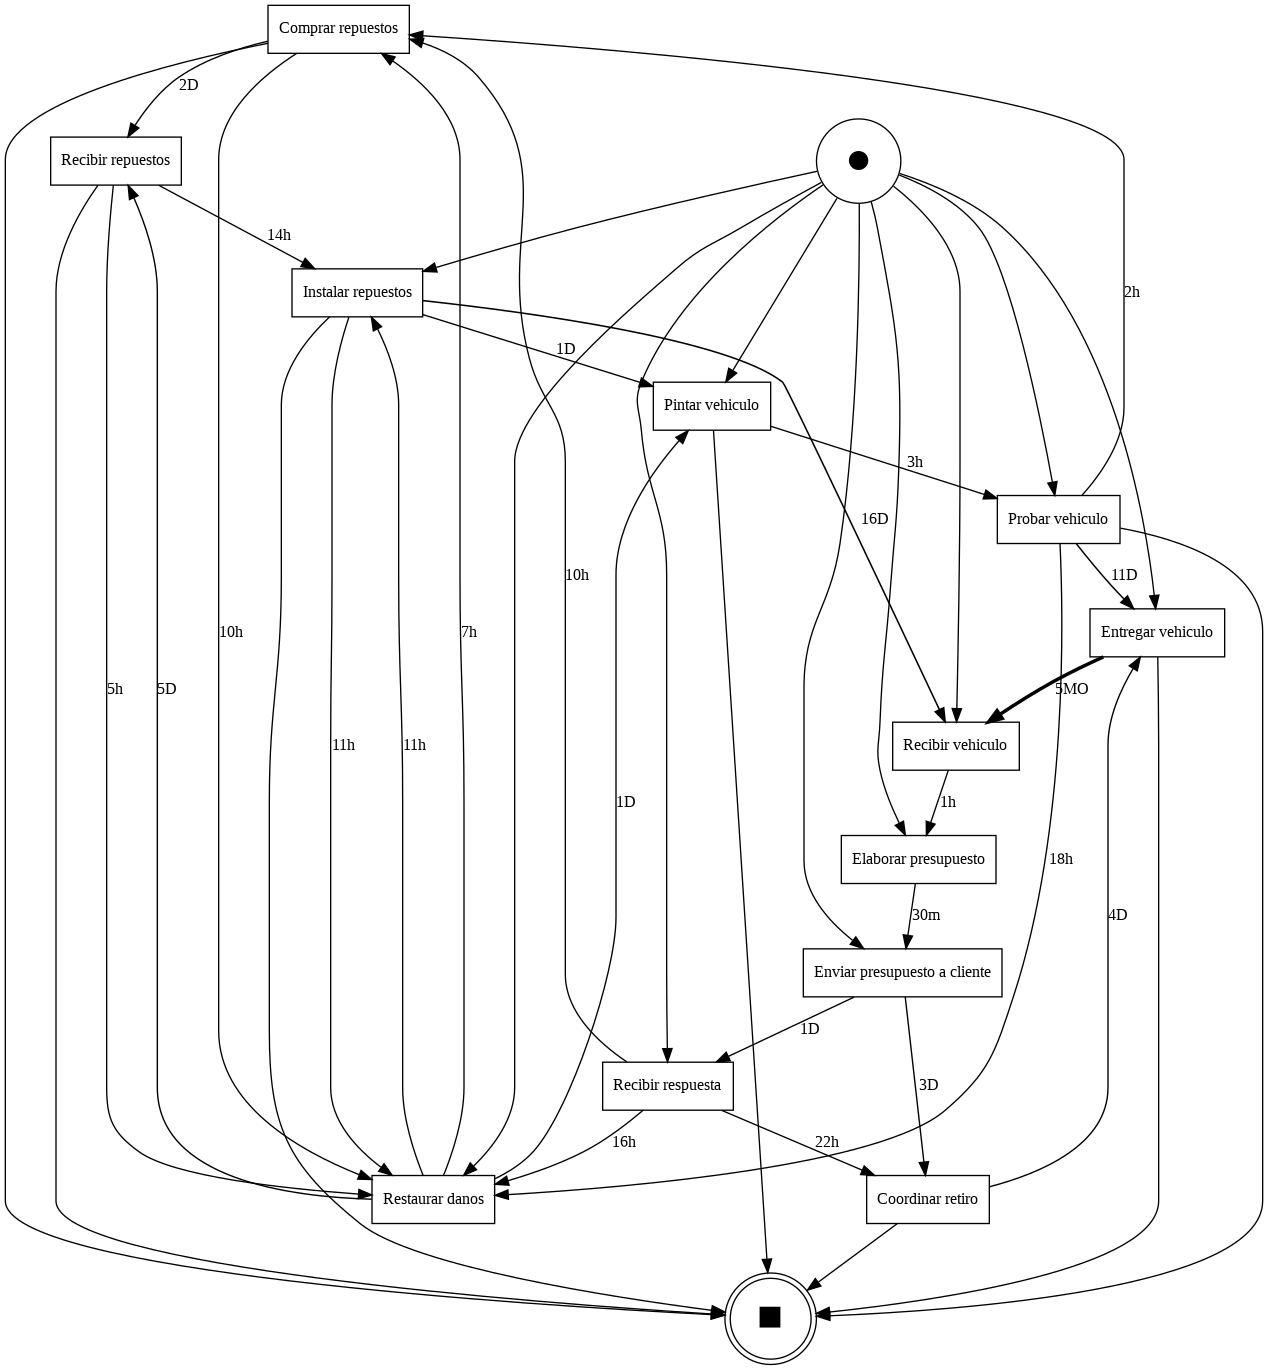

''

In [32]:
# Se realiza el descubrimiento
dfg, start_activities, end_activities = pm4py.discovery.discover_performance_dfg(log_csv.copy())

# Para ver la visualización
pm4py.vis.view_performance_dfg(dfg, start_activities, end_activities, format = 'png', rankdir = 'TB')

# Para guardar la visualización
pm4py.vis.save_vis_performance_dfg(dfg, start_activities, end_activities, file_path = "dfg_perf_new.png")

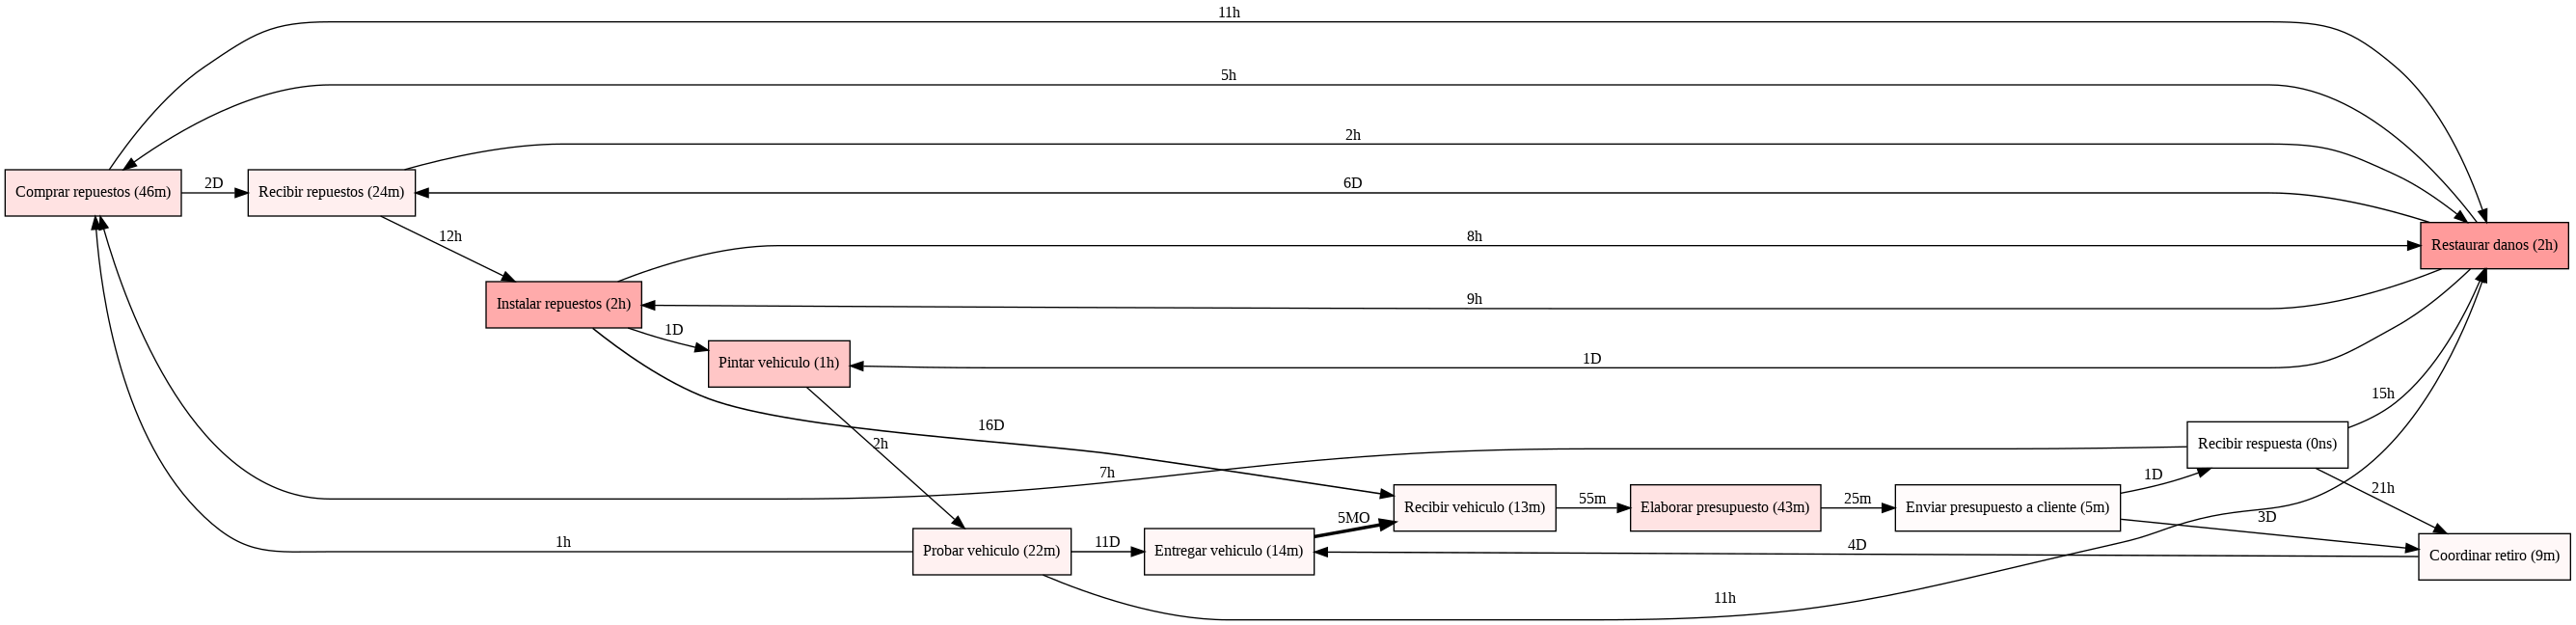

''

In [33]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.util import constants


log_csv['Inicio'] = log_csv['Inicio'].astype('datetime64[ns]')

# Se realiza el descubrimiento
dfg = dfg_discovery.apply(log_csv.copy(), variant = dfg_discovery.Variants.PERFORMANCE,
                          parameters={constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY: "Inicio", constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})

# Se genera la visualización
dfg_vis = dfg_visualization.apply(dfg, log = log_csv.copy(), variant = dfg_visualization.Variants.PERFORMANCE,
                                  parameters={constants.PARAMETER_CONSTANT_START_TIMESTAMP_KEY: "Inicio", constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})

# Ver visualización
dfg_visualization.view(dfg_vis)

# Guardar visualización
dfg_visualization.save(dfg_vis, "dfg_perf_old.png")

## Conclusion
This project demonstrates how **social mining** can be applied to event logs to reveal resource interaction patterns that are not visible in control-flow models alone.
The resulting relationships support operational diagnostics (handoff friction, collaboration structure, workload distribution) and provide a strong foundation for deeper analyses such as organizational mining, role discovery, or performance-driven staffing insights.
